**Time Series Course Notebook 3**

*# Time Series Concepts*

* Trends
* Seasonality
* Cyclincal

* Hodrick-Prescott filter: separates a time-series y_t into a trend component and a cyclical component. y_t =t_t + c_t



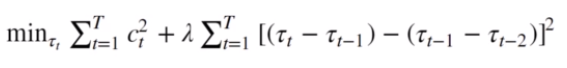

In [1]:
import numpy as np
import pandas as pd

In [5]:
# Import Dataset

df = pd.read_csv("C:\\Users\\Simon\\Documents_local\\GitHub2\\UdemyTimeSeries\\Udemy_TimeSeries_res\\Data\\macrodata.csv", index_col=0, parse_dates =True)

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

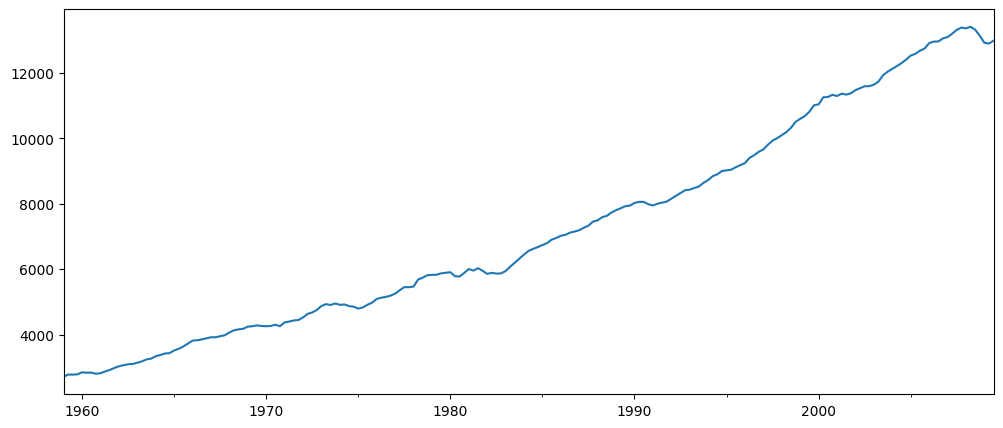

In [8]:
#Plot Gdp

df['realgdp'].plot(figsize=(12,5))

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [10]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

<Axes: >

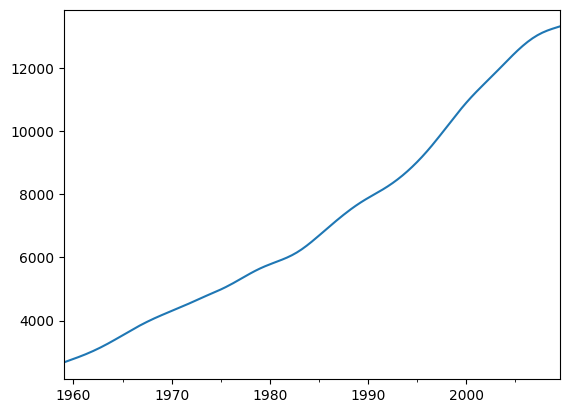

In [15]:
gdp_trend.plot()

In [16]:
df['trend']= gdp_trend
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,13222.581545
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,13249.189472
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,13274.457706
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,13299.061073


<Axes: >

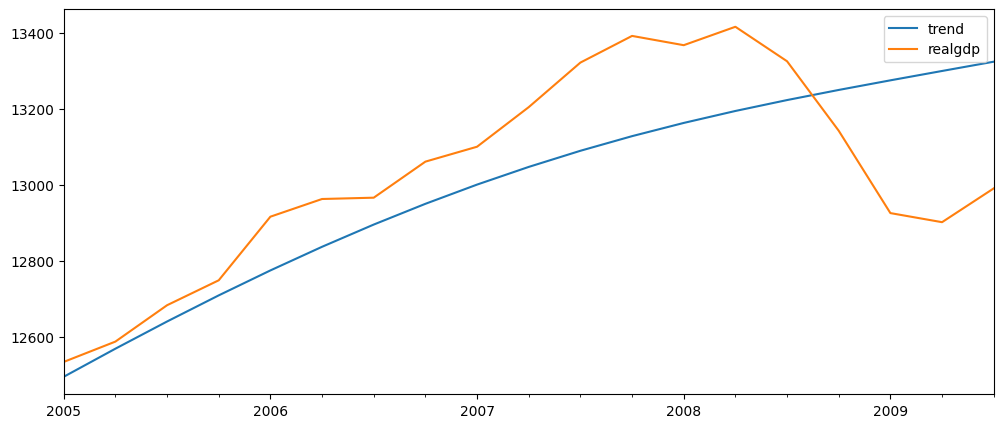

In [18]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

In [2]:
import numpy as np
import pandas as pd

In [19]:
# ETS Models (Error-Trend-Seasonality)
    # - Exponential Smoothing
    # - Trend Methods Models
    # - ETS Decomposition


In [3]:
airline = pd.read_csv('C:\\Users\\Simon\\Documents_local\\GitHub2\\UdemyTimeSeries\\Udemy_TimeSeries_res\\Data\\airline_passengers.csv', index_col='Month', parse_dates= True)

In [6]:
airline = airline.dropna()

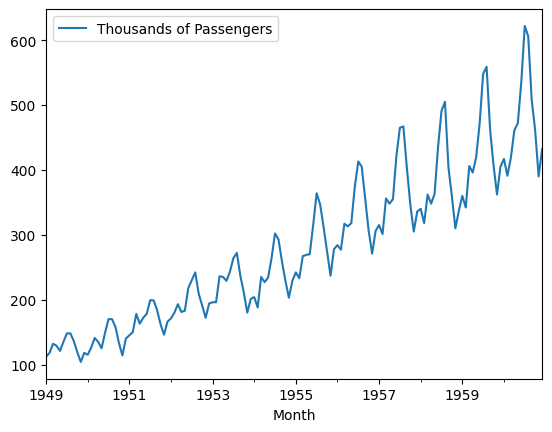

In [9]:
airline.plot();

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
#result.trend.head(15)
# we can see each individual component with result. (trend, error, seasonality)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
Name: trend, dtype: float64

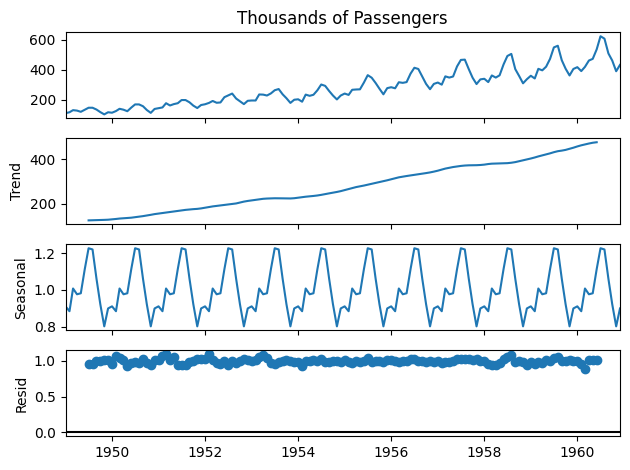

In [17]:
result.plot();

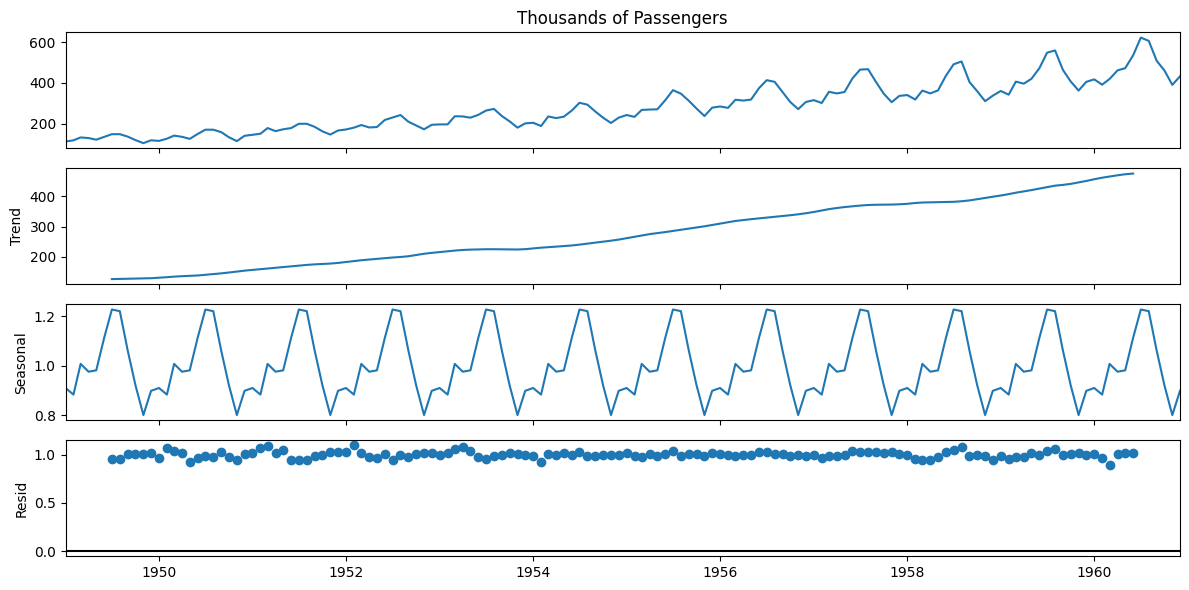

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

result.plot();

In [ ]:
# EWMA Models
    # SMA - Simple Moving Averages
    # Expand the idea into an EWMA
    # Have recent data be weighted more than older data
    # SMA basic model has some weaknesses
        # as window recudes, we pick up more noise and less signal
        # Always lagging by the window
        # Never reach to full peak or 
        # Lacks predictive capabilities

In [23]:
airline.index = pd.to_datetime(airline.index)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [25]:
airline['6-month-MA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-MA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

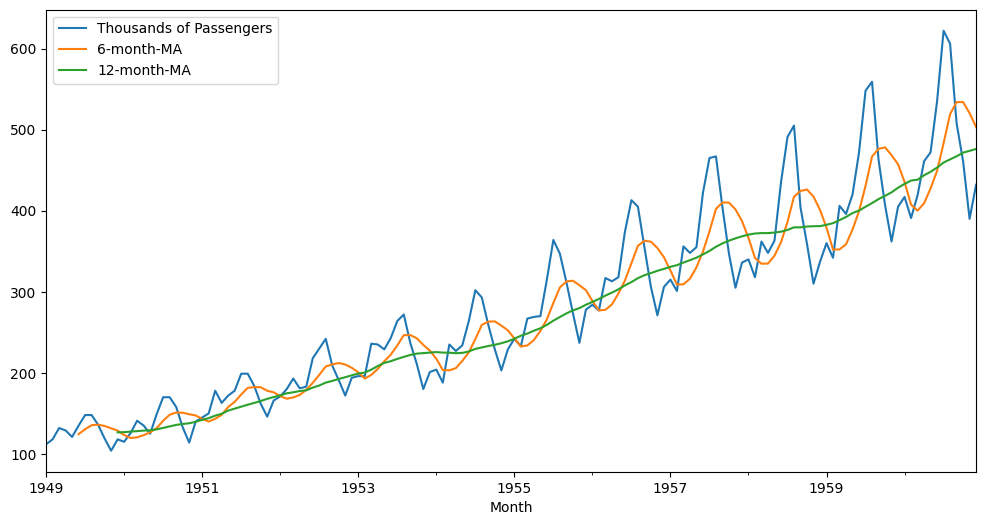

In [26]:
airline.plot()

In [ ]:
#EWMA

airline['EWMA-12'] = airline['Thousands of Passengers'].ewm